# Tutorial on the usage of spherical_density tool

Here, two examples on how to use the spherical_density tool for the calculation of the distribution of components of a micelle. First we will show how to use spherical_density to calculate the density of the hydrophobic block of the polymer. Then we will show how to use spherical_density_water to calculate the spherical density of the water in the simulation

## spherical_density tool 

Before starting any analysis, load the neccesary modules for this class.

In [1]:
from  utils_mda import MDA_input
#from pysoftk.pol_analysis.tools.utils_mda import MDA_input
from utils_tools import *
#from pysoftk.pol_analysis.tools.utils_tools import *
from clustering import SCP
#from pysoftk.pol_analysis.clustering import SCP
from make_micelle_whole import micelle_whole
#from pysoftk.pol_analysis.make_micelle_whole import micelle_whole
from spherical_density import spherical_density
#from pysoftk.pol_analysis.spherical_density import spherical_density

import numpy as np
import pandas as pd

/home/raquellrdc/Desktop/PhD/mda_umap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Select your simulation files, it is recommended to use a tpr file for the topology and xtc file for the trajectory.

In [2]:
topology='data/spherical_density.tpr'
trajectory='data/spherical_density.xtc'

2. Import the clustering data from SCP function

In [3]:
resids_total='data/spherical.parquet'

3. Obtain the largest micelle from the clustering pandas dataframe

In [4]:
largest_micelle_resids = micelle_whole(topology, trajectory).obtain_largest_micelle_resids(resids_total)

4. 'largest_micelle_resids' is a np.array with the resids of the molecules that belong to the same cluster of the steps of the trajectory where SCP was ran.

In [5]:
largest_micelle_resids

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 1,  2,  3,  4, 

Now, let's obtain the coordinates of the largest micelle made whole across the pbc

5. Let's define the resname of the molecules that we want to make whole. More than one resname can be inputted. Note that it should be the resname of the molecules of the largest_micelle array.

In [6]:
resname=['LIG']


6. Also, define the start, step and end point of the trajectory frames that you want to run the analysis on. Note that they need to be the same as the ones you ran the SCP clustering on.

In [7]:
start=0
stop=1000
step=2

7. Obtain the whole coordinates of the micelle. This is key to perform the densitity calculation taking properly into account the PBC

In [8]:
atom_pos = micelle_whole(topology, trajectory).running_make_cluster_whole(resname, largest_micelle_resids, start, stop, step)

  0%|                                                                                                                                                   | 0/11 [00:00<?, ?it/s]/home/raquellrdc/Desktop/PhD/pysoftk/alejandro_newest_releast_check/pysoftk_analysis_code/test_final/make_micelle_whole.py:347: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  atom_positions_over_trajectory = list(tqdm(map(self.make_cluster_whole, frames, resname, cluster_resids_f[0],
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]

Elapsed time for matrix calculation: 18.3857 seconds


Now, atom_pos contains the coordinates of all the atoms of the connected micelle at each time step selected. In each array, the first element is the time frame of the analysis, and the second the positions array

In [9]:
atom_pos

[(0,
  array([[60.480003, 66.19    , 66.72    ],
         [60.25    , 67.75    , 66.810005],
         [59.27    , 67.920006, 66.380005],
         ...,
         [64.94    , 78.240005, 70.75    ],
         [65.840004, 79.5     , 69.91    ],
         [64.170006, 79.47    , 69.840004]], dtype=float32)),
 (2,
  array([[ 64.560005 , -32.676575 ,  -2.266571 ],
         [ 64.64     , -34.04657  ,  -3.0565643],
         [ 65.47     , -34.066574 ,  -3.7565765],
         ...,
         [ 64.5      , -32.426567 ,  10.710001 ],
         [ 65.04     , -33.666573 ,   9.540001 ],
         [ 63.730003 , -33.976578 ,  10.780001 ]], dtype=float32)),
 (4,
  array([[ 27.390001, -42.42649 ,  12.390001],
         [ 27.95    , -43.74649 ,  11.700001],
         [ 28.77    , -44.206497,  12.25    ],
         ...,
         [  9.2     , -42.8665  ,  11.170001],
         [ 10.200001, -42.9265  ,   9.700001],
         [ 10.26    , -41.586494,  10.760001]], dtype=float32)),
 (6,
  array([[-8.724823  , 15.52      , 41

8. We are almost ready for the density calculation. But first, we need to define the atoms for which you want to calculate the density. In this case, we are going to calculate the density of the hydrophobic block of the polymer, so we are going to select the main backbone atoms of the hydrophobic block.

In [10]:
 MA_names_total =['C00A', 'C009', 'C008', 'C007', 'C006', 'C005', 'C004', 'C003', 'C002', 'C001', 'C000', 'C00L', 
                  'C00O', 'C00P', 'C00Q', 'C00R', 'C00S', 'C00T', 'C00W', 'C00X', 'C010', 'C011', 'C014', 'C015',
                  'O001', 'O002', 'O005', 'O007', 'O008', 'O00A', 'O00O', 'O00L', 'O00C', 'O00F', 'O00G', 'O00J', 
                  'O00K', 'C01F', 'C017', 'C013', 'O00H', 'C012', 'C00V', 'O00D', 'C00U', 'C00Z', 'O00E', 'C00Y', 
                  'C019', 'O00M', 'C018',  'C01B', 'O00N', 'C01A', 'C00N', 'O00B', 'C00M', 'C00J', 'O009', 'C00K', 
                  'C00H', 'O006', 'C00I', 'C00G', 'O004', 'C00F', 'C00E', 'O003', 'C00D', 'C00C', 'O000', 'C00B']

9. That's it! We have all the neccesary input files for the spherical density calculation of the hydrophobic component. This function outputs two arrays, in the first one the density values are stored. The second one contains the binned space values. This function outputs these two arrays for easier plotting.

In [11]:
spherical_density_whole, binned_space = spherical_density(topology, trajectory).run_density_calc('resid ', largest_micelle_resids, atom_pos, MA_names_total)

Note that we have included the word 'resid ' in the function. This is for the user be able to define any other selection motif, such as resname. It is important to keep in mind, that the molecules selected must be wihtin the coordinates that are stored in 'atom_pos'.

Now, let's plot the density to see how it looks. 

Text(0.5, 1.0, 'Spherical density of MA')

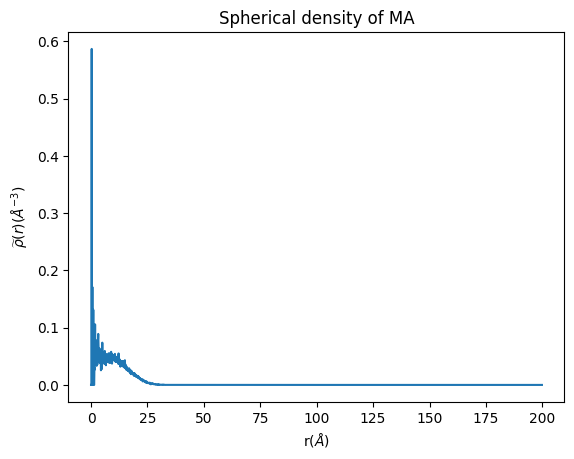

In [12]:
import matplotlib.pyplot as plt

plt.plot(binned_space, spherical_density_whole)

plt.xlabel('r($\AA$)')
plt.ylabel('$\widetilde{\u03C1}(r)$($\AA^{-3}$)')
plt.title('Spherical density of MA')

For a different atom selection (for example for the calculation of the density hydrophilic polymer block), it would be as simple as changing the atom selection.

## spherical_density_water tool

Now, let's calculate the density of the water in the same simulation. For this we need a different tool, spherical_density_water. We are going to use the same trajectory, so no need to load it again. We just need to start by importing the spherical_density_water class

In [13]:
#from pysoftk.pol_analysis.spherical_density_water import spherical_density_water
from spherical_density_water import spherical_density_water

We have already obtained the resids of the polymer belonging to the largest micelle as well as the atom positions of the micelle made whole across the PBC. So the only inputs needed for this function are the name of the solvant atoms that we want to calculate the density of. In this case the solvent is water, so we will pick the oxygen atoms.

In [14]:
water_atoms=['OW']

We are ready to run the density of the water!

In [15]:
spherical_density_whole_water, binned_space_water = spherical_density_water(topology, trajectory).run_density_calc('resid ', largest_micelle_resids, atom_pos, 'name ', water_atoms, start, stop, step)


Now let's plot it to see how it looks

Text(0.5, 1.0, 'Spherical density of Water')

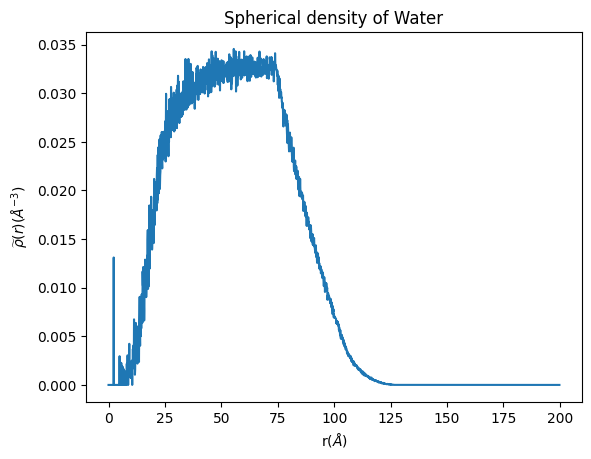

In [18]:
plt.plot(binned_space_water, spherical_density_whole_water)

plt.xlabel('r($\AA$)')
plt.ylabel('$\widetilde{\u03C1}(r)$($\AA^{-3}$)')
plt.title('Spherical density of Water')